# PCA from Scratch (Eigen Decomposition)

Here we show the implementation of PCA (principal component analysis) via eigen decomposition of covariance matrix. Other implementations also exist, e.g. via SVD (singular value decomposition).

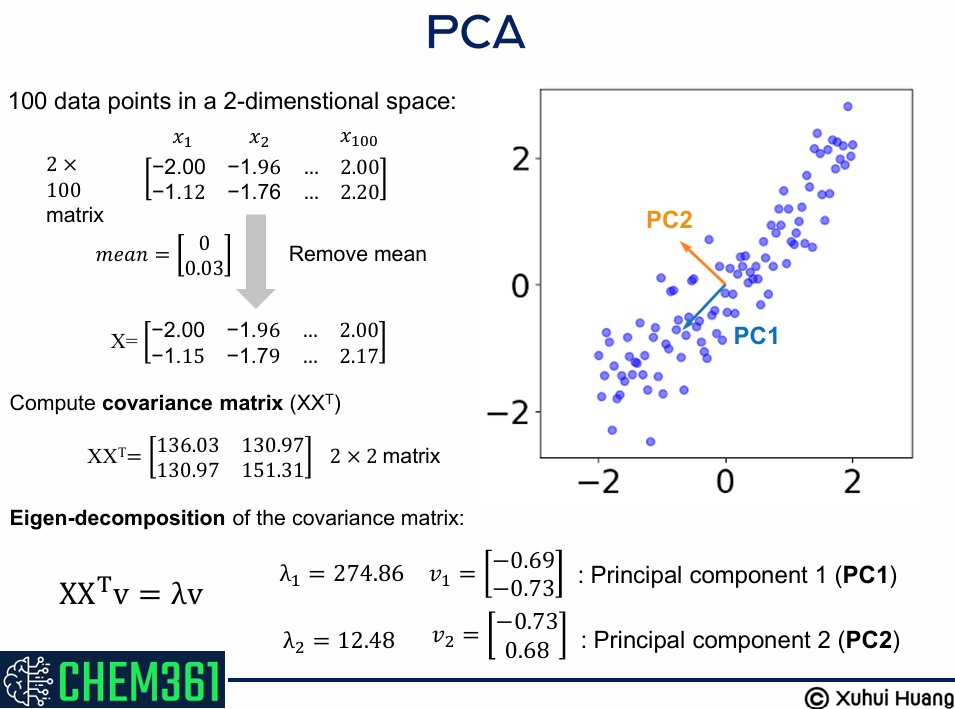

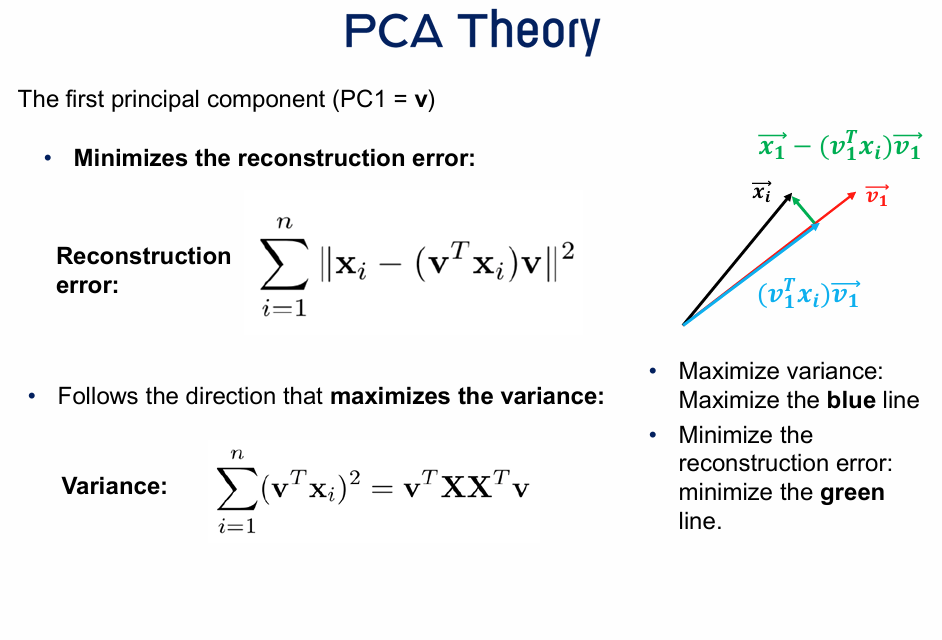

In [1]:
import random
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(cmap.N)]

mpl.rcParams["font.size"] = 24
mpl.rcParams["lines.linewidth"] = 2

seed = 0
random.seed(seed)
np.random.seed(seed)
n_samples = 100
markersize = 100

## Sample 100 data points

In [2]:
# sample some data with noise
x = np.linspace(-2, 2, n_samples)
y = x
y_noised = y + np.random.randn(n_samples)*0.5

samples = np.hstack([x.reshape(-1, 1), y_noised.reshape(-1, 1)])

(np.float64(-2.2),
 np.float64(2.2),
 np.float64(-2.7324411631352845),
 np.float64(3.076154229443891))

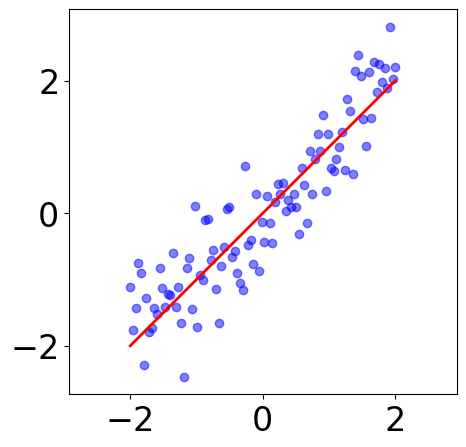

In [3]:
plt.figure(figsize=(5, 5))
plt.scatter(samples[:, 0], samples[:, 1], c="blue", alpha=0.5)
plt.plot(x, y, "r-")
# plt.axis("off")
plt.axis("equal")

## Eigen Decomposition of Covariance Matrix

In [4]:
# remove mean from samples
demeaned = True
# define number of components
ncomponents = 2

data = samples

if demeaned:
    avg = np.mean(data, axis=0)
    data = data - avg

# compute covariance matrix
cov = data.T@data # (2xn) x (nx2)

# eigen decomposition of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov)
# sort eigenvectors by eigenvalues, making sure the first PCs always capture more variance
sorted_indices = np.argsort(eigenvalues)[::-1]
eigval = eigenvalues[sorted_indices]
eigvec = eigenvectors[:, sorted_indices]

# the PCs we want
pcs = eigvec[:, :ncomponents]

In [5]:
eigval

array([274.86336587,  12.47505606])

In [6]:
eigvec

array([[-0.68620272, -0.72741035],
       [-0.72741035,  0.68620272]])

## Plot PCs

(np.float64(-2.2),
 np.float64(2.1999999999999997),
 np.float64(-2.762345170902527),
 np.float64(3.0462502216766483))

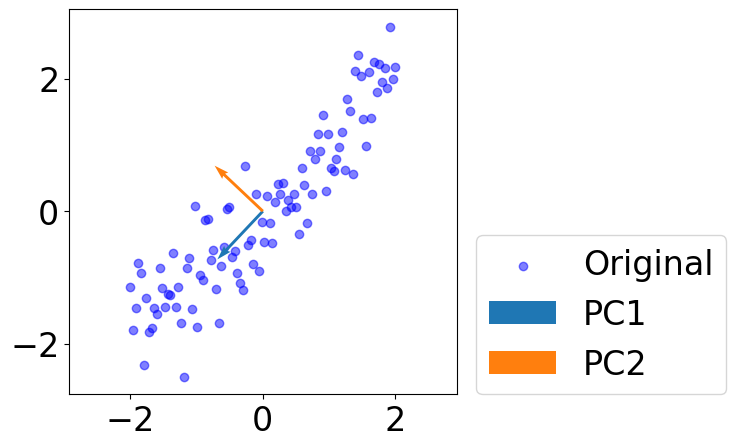

In [7]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1], c="blue", alpha=0.5, label="Original")

for i in range(pcs.shape[1]):
    plt.quiver(*(0, 0), *(pcs[:, i]),
               scale=1, scale_units="xy", angles="xy", \
               color=colors[i], label=f"PC{i+1}")


plt.legend(loc=(1.05, 0))
# plt.axis("off")
plt.axis("equal")

## Plot reconstructed data on each PC

/tmp/ipython-input-2246182277.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(reconstruct[:, 0], reconstruct[:, 1], \


(np.float64(-2.2176850329290465),
 np.float64(2.507215501709723),
 np.float64(-2.762345170902527),
 np.float64(3.0462502216766483))

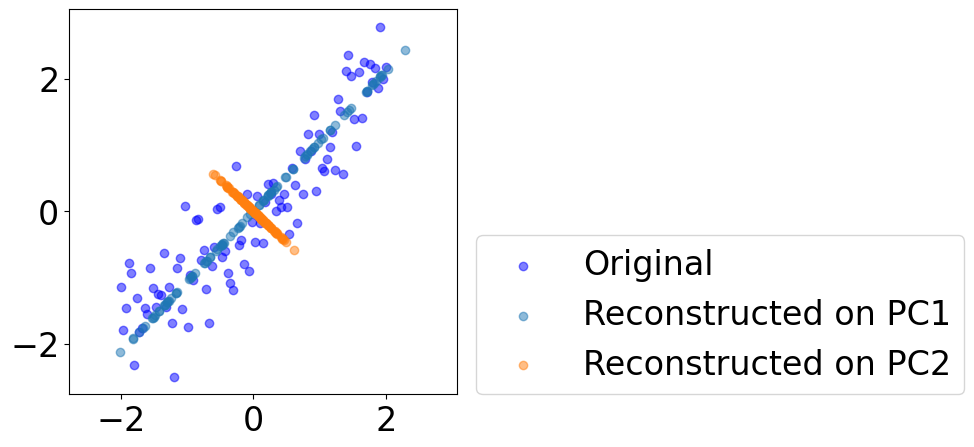

In [8]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1],
            c="blue", alpha=0.5, label="Original")
for i in range(pcs.shape[1]):
    pc = eigvec[:, i].reshape((-1, 1))
    reconstruct = data@pc@pc.T

    plt.scatter(reconstruct[:, 0], reconstruct[:, 1], \
        c=colors[i], alpha=0.5, label=f"Reconstructed on PC{i+1}")
    plt.legend(loc=(1.05, 0))
# plt.axis("off")
plt.axis("equal")

## Plot projection of one datapoint on PC1

(np.float64(-2.2),
 np.float64(2.1999999999999997),
 np.float64(-2.762345170902527),
 np.float64(3.0462502216766483))

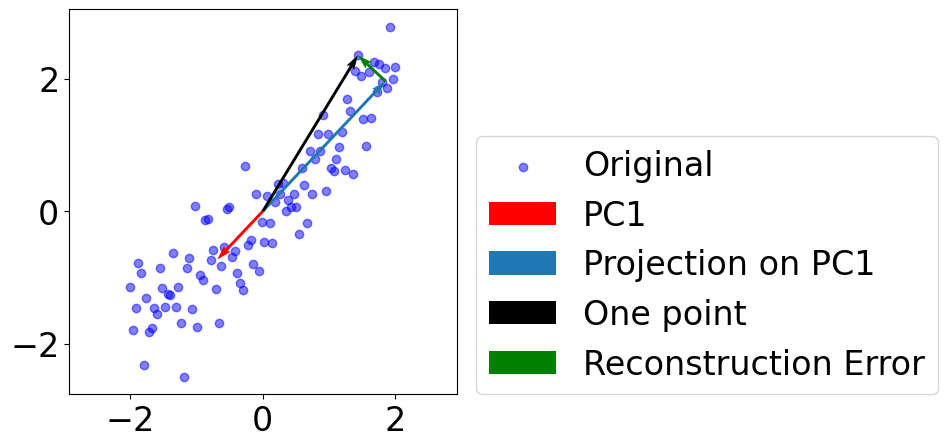

In [9]:
i = 0 # PC1
k = 85 # a good datapoint

fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1],
            c="blue", alpha=0.5, label="Original")

plt.quiver(*(0, 0), *(pcs[:, i]),
            scale=1, scale_units="xy", angles="xy", \
            color="r", label=f"PC{i+1}")


pc = eigvec[:, i].reshape((-1, 1))
reconstruct = data@pc@pc.T

plt.quiver(0, 0, reconstruct[k, 0], reconstruct[k, 1], \
    scale=1, scale_units="xy", angles="xy", \
    color=colors[i], label=f"Projection on PC{i+1}")

plt.quiver(0, 0, data[k, 0], data[k, 1], \
    scale=1, scale_units="xy", angles="xy", \
    color="k", label=f"One point")

plt.quiver(reconstruct[k, 0], reconstruct[k, 1], # start point
           data[k, 0]-reconstruct[k, 0], data[k, 1]-reconstruct[k, 1], # vector
            scale=1, scale_units="xy", angles="xy", \
            color="green", label=f"Reconstruction Error")

plt.legend(loc=(1.05, 0))
# plt.axis("off")
plt.axis("equal")